In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
print(os.listdir("../input"))

['isic-2019']


In [ ]:
path = "isic-2019"

In [9]:
meta = pd.read_csv(path + 'ISIC_2019_Training_GroundTruth.csv')
#meta = pd.read_csv(path + 'ISIC_2019_Training_Metadata.csv')
meta.head(20)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ISIC_0000006,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ISIC_0000007,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,ISIC_0000008,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ISIC_0000009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,ISIC_0000010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
md = pd.read_csv(path + 'ISIC_2019_Training_Metadata.csv')
md

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male
...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female


In [11]:
import pandas as pd

# binary encoding to a column of strings
meta['lesion_id'] = meta.iloc[:, 1:].apply(lambda row: row.idxmax(), axis=1)

# convert lesion_id to lowercase
meta["lesion_id"] = meta['lesion_id'].str.lower()
meta.head(10)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,lesion_id
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mel
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mel
5,ISIC_0000006,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv
6,ISIC_0000007,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv
7,ISIC_0000008,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv
8,ISIC_0000009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv
9,ISIC_0000010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv


In [12]:
# description from ISIC
lesion_types = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'ak': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma',
    'scc' : 'squamous cell carcinoma',
    'unk' : 'unknown'
}

lesion_type_short = {
    'nv': 0,
    'mel': 1,
    'bkl': 2,
    'bcc': 3,
    'ak': 4,
    'vasc': 5,
    'df': 6,
    'scc' : 7,
    'unk' : 8
}

lesion_names = ['Melanocytic nevi','Melanoma','Benign keratosis-like lesions ',
               'Basal cell carcinoma','Actinic keratoses','Vascular lesions',
               'Dermatofibroma', "Squamous cell carcinoma", "Unknown"]

lesion_names_short = ['nv','mel','bkl','bcc','ak','vasc','df']

meta['lesion_type']=meta['lesion_id'].map(lesion_types)
meta['lesion_type_short'] = meta['lesion_id'].map(lesion_type_short)

print('Total number of images %i' %(len(meta)))

meta['lesion_type'].value_counts()

Total number of images 25331


Melanocytic nevi                  12875
Melanoma                           4522
Basal cell carcinoma               3323
Benign keratosis-like lesions      2624
Actinic keratoses                   867
squamous cell carcinoma             628
Vascular lesions                    253
Dermatofibroma                      239
Name: lesion_type, dtype: int64

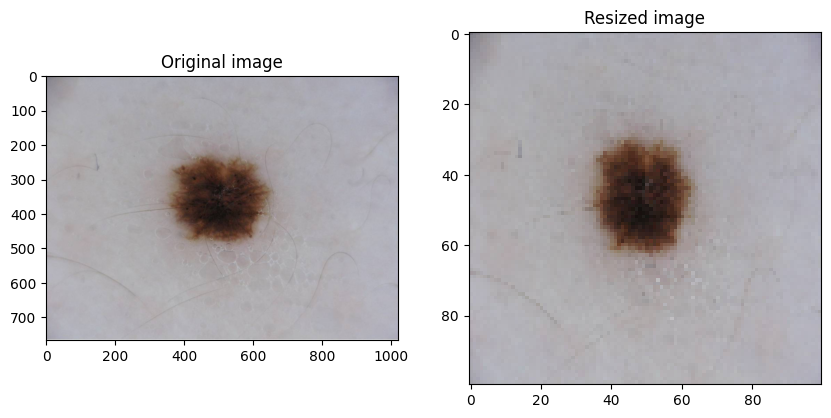

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from cv2 import imread, resize

# retrieve images
images = np.array(meta['image'])
folder = path + 'ISIC_2019_Training_Input/ISIC_2019_Training_Input/' + str(images[1]) + '.jpg'
img = imread(folder)

resized_img = resize(img,(100,100))

# show one exampe image

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(resized_img[:,:,::-1])
plt.title('Resized image')
plt.show()

In [14]:
# remove all unknowns and squamous cell carcinoma entries
import pandas as pd

# Assuming your existing dataframe is named 'df'
#meta = meta[(meta['lesion_type_short'] != 7) & (meta['lesion_type_short'] != 8)]
meta['lesion_type'].value_counts()

Melanocytic nevi                  12875
Melanoma                           4522
Basal cell carcinoma               3323
Benign keratosis-like lesions      2624
Actinic keratoses                   867
squamous cell carcinoma             628
Vascular lesions                    253
Dermatofibroma                      239
Name: lesion_type, dtype: int64

In [15]:
import os
import cv2
from cv2 import imread, resize

# function for importing images from the two folders
# augment argument is set to false
# because images are only used for evaluation purposes
def image_importer(path, append=True, X:list=[], y:list=[], augment=True):
  dir_list = os.listdir(path)
  #dir_list = np.array(meta['image'])

  if append:
    # allows for adding images to established containers
    pass
  else:
    # initialize empty containers for predictor and target images
    X = []
    y = []
  try:
      for i in range(len(dir_list)):
          fname_image = dir_list[i]
          if fname_image[-3:] != "jpg":
            continue
          fname_id = fname_image.replace('.jpg','')

          # features|predictors
          folder = path + str(fname_image)
          img = imread(folder)
          resized_img = resize(img,(100, 100))
          X.append(resized_img)

          # targets|predicted
          output = np.array(meta[meta['image'] == fname_id].lesion_type_short)
          y.append(output[0])

          if augment:
              # add more images for class between 1-6, by rotation and flipping
              if output != 0:
                  new_img = augment(resized_img)
                  for i in range(5):
                      X.append(new_img[i])
                      y.append(output[0])
          else:
            pass

              # print progress
          if append==False and i % int(100) == 0: # (not append)
             # print(i,'images loaded')
             # "{char_start:filler<right^center>left-ragged[f_loat,d_ecimal, s_tring]}".format(...)
              print("{0:-<7d}".format(i), "images loaded") # d stands for decimal
          elif append and (len(dir_list)+i) % int(100) == 0:
            #print((len(X)+i), "images loaded")
              print("{0:-<7d}".format(len(dir_list)+i), "images loaded")

          if i == 500:
                break
  except BaseException:
     return X, y

  return X, y

In [16]:
training_img = path + "ISIC_2019_Training_Input/ISIC_2019_Training_Input/"
# importing the images and storing them the feature variable X
X, y = image_importer(training_img, append=False, augment=False)

0------ images loaded
100---- images loaded
200---- images loaded
300---- images loaded
400---- images loaded
500---- images loaded


In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
# matrix dimensions
print(X.shape)
print(y.shape)

(501, 100, 100, 3)
(501,)


Removing "squamous cell carcinoma" and "unknown" from the data as the models have not been trained on these classes

In [19]:
import numpy as np

# binary mask
mask = (y >= 0) & (y <= 6)

# filter X and y by mask to omit the two additional classes (scc and unk)
X_filtered = X[mask]
y_filtered = y[mask]

# Display the shapes of the filtered arrays
print("X_filtered shape:", X_filtered.shape)
print("y_filtered shape:", y_filtered.shape)


X_filtered shape: (491, 100, 100, 3)
y_filtered shape: (491,)


In [21]:
from keras.utils import to_categorical
y_train = to_categorical(y_filtered, num_classes=7)
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Evaluation on ISIC 2019 Dataset

Importing the models trained from working directory

In [45]:
model_path = "../models/"

# CNN

In [46]:
import keras
from keras.models import load_model
# from tensorflow.keras import models
cnn = load_model(model_path+"CNN.h5")

In [47]:
y_pred = cnn.predict(X_filtered)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(y_pred)):
    if np.argmax(y_pred[i]) == np.argmax(y_filtered[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)

    total += 1

print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)

print('Accuracy:', round(accurate/total*100, 3), '%')

16/16 [==============================] - 3s 124ms/step
Total-test-data; 491 	accurately-predicted-data: 364 	 wrongly-predicted-data:  127
Accuracy: 74.134 %


In [48]:
# compute predictions
y_pred_prob = np.around(cnn.predict(X_filtered),3)
y_pred = np.argmax(y_pred_prob,axis=1)

y_test2 = y_filtered

meta

16/16 [==============================] - 1s 80ms/step


,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,lesion_id,lesion_type,lesion_type_short
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv,Melanocytic nevi,0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv,Melanocytic nevi,0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mel,Melanoma,1
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv,Melanocytic nevi,0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mel,Melanoma,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,bcc,Basal cell carcinoma,3
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,bkl,Benign keratosis-like lesions,2
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mel,Melanoma,1
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv,Melanocytic nevi,0


In [49]:
from sklearn.metrics import  precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from tensorflow.python.platform import build_info as tf_build_info

predictions = cnn.predict(X_filtered)

#geting predictions on test dataset
y_pred = np.argmax(predictions, axis=1)
targetnames = ['nv','mel','bkl','bcc','ak','vasc','df']
#getting the true labels per image
#y_true = X_test.classes
#y_true = np.argmax(X_test, axis=1)
#y_true = lesion_names[X_test]
y_true = [lesion_names_short[y_test2[index]] for index in range(len(y_test2))]
y_true = [lesion_type_short[c] for c in y_true]
#getting the predicted labels per image
y_prob=predictions
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_true)

# Creating classification report
report = classification_report(y_true, y_pred, target_names=targetnames)

print("\nClassification Report:")
print(report)

16/16 [==============================] - 2s 113ms/step

Classification Report:
              precision    recall  f1-score   support

          nv       0.85      0.88      0.87       280
         mel       0.73      0.61      0.67        87
         bkl       0.47      0.38      0.42        39
         bcc       0.77      0.52      0.31        67
          ak       0.35      0.34      0.35         7
        vasc       1.00      0.86      0.92         7
          df       0.35      0.75      0.48         4

    accuracy                           0.70       491
   macro avg       0.58      0.52      0.55       491
weighted avg       0.62      0.60      0.59       491



# CNN+SA

In [22]:
!wget https://raw.githubusercontent.com/MarkusStefan/DeepCNN_SoftAttention/main/SoftAttention.py

--2023-06-29 12:42:52--  https://raw.githubusercontent.com/MarkusStefan/DeepCNN_SoftAttention/main/SoftAttention.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3387 (3.3K) [text/plain]
Saving to: ‘SoftAttention.py’

SoftAttention.py    100%[===================>]   3.31K  --.-KB/s    in 0s      

2023-06-29 12:42:53 (41.8 MB/s) - ‘SoftAttention.py’ saved [3387/3387]



In [39]:
import keras
from keras.utils import plot_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, \
    BatchNormalization, concatenate, AveragePooling2D
from keras.optimizers import Adam
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Model
from keras.layers.core import Dropout, Activation
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Input


input_layer = Input(shape=(100, 100, 3))

deep = Conv2D(filters=64, kernel_size=(7, 7), strides=(2, 2), activation='relu')(input_layer)
deep = BatchNormalization()(deep)
deep = MaxPool2D(pool_size=(3, 3), strides=(2, 2))(deep)

deep = Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), activation='relu', padding="same")(deep)
deep = BatchNormalization()(deep)
deep = MaxPool2D(pool_size=(3, 3), strides=(1, 1))(deep)

deep = Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same")(deep)
deep = BatchNormalization()(deep)
deep = MaxPool2D(pool_size=(3, 3), strides=(1, 1))(deep)

deep = Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same")(deep)
deep = BatchNormalization()(deep)

deep = Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same")(deep)
deep = BatchNormalization()(deep)
# leafe out max pooling as it will be done in the soft attention layer
#deep = MaxPool2D(pool_size=(3, 3), strides=(1, 1))(deep)

#deep, mapping = SoftAttention(ch=int(deep.shape[-1]), m=10, concat_with_x=False, aggregate=True, name="SOFT-ATTENTION")(deep)
soft_attention, mapping = SoftAttention(ch=int(deep.shape[-1]), m=12, concat_with_x=False, aggregate=True, name="SOFT-ATTENTION")(deep)
soft_attention = (MaxPool2D(pool_size=(1, 1), strides=(1, 1))(soft_attention))
#deep = concatenate([deep, soft_attention])
deep = MaxPool2D(pool_size=(3, 3), strides=(1, 1))(deep)
deep = Activation("relu")(deep)

deep = Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same")(deep)
deep = BatchNormalization()(deep)
deep = MaxPool2D(pool_size=(3, 3), strides=(1, 1))(deep)


deep = Flatten()(deep)

deep = Dense(4096, activation='relu')(deep)
deep = Dropout(0.5)(deep)

deep = Dense(4096, activation='relu')(deep)
deep = Dropout(0.5)(deep)

output = Dense(7, activation='softmax')(deep)

cnn_sa = Model(inputs=input_layer, outputs=output)
cnn_sa.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_84 (Conv2D)          (None, 47, 47, 64)        9472      
                                                                 
 batch_normalization_84 (Bat  (None, 47, 47, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 batch_normalization_85 (Bat  (None, 12, 12, 128)      512 

In [54]:
import keras
from keras.models import load_model
from SoftAttention import SoftAttention
# load the weights from previous trainings
cnn_sa.load_weights(model_path+"CNN_SA.h5")

In [55]:
from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report ,confusion_matrix
from tensorflow.python.platform import build_info as tf_build_info

predictions = cnn_sa.predict(X_filtered)

#geting predictions on test dataset
y_pred = np.argmax(predictions, axis=1)
targetnames = ['nv','mel','bkl','bcc','ak','vasc','df']
#getting the true labels per image
#y_true = X_test.classes
#y_true = np.argmax(X_test, axis=1)
#y_true = lesion_names[X_test]
y_true = [lesion_names_short[y_test2[index]] for index in range(len(y_test2))]
y_true = [lesion_type_short[c] for c in y_true]
#getting the predicted labels per image
y_prob=predictions
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_true)

# Creating classification report
report = classification_report(y_true, y_pred, target_names=targetnames)

print("\nClassification Report:")
print(report)

16/16 [==============================] - 2s 137ms/step

Classification Report:
              precision    recall  f1-score   support

          nv       0.82      0.97      0.89       280
         mel       0.76      0.57      0.65        87
         bkl       0.62      0.75      0.68        39
         bcc       0.94      0.45      0.61        67
          ak       0.50      0.42      0.45         7
        vasc       1.00      0.95      0.98         7
          df       0.50      0.50      0.50         4

    accuracy                           0.72       491
   macro avg       0.64      0.60      0.61       491
weighted avg       0.63      0.63      0.59       491

